In [1]:
import numpy as np
from random import randrange
from random import sample
from random import shuffle
import networkx as nx
from tqdm import tqdm

In [2]:
def adjacency_generator(min_clique_size_of_certain_type=1, 
                        max_clique_size_of_certain_type=16):
    
    num_of_cliques_by_type = np.arange(min_clique_size_of_certain_type, 
          max_clique_size_of_certain_type + 1).tolist()
    num_of_cliques_by_type.append(0) # the possibility not to include some type of clique
    num_of_cliques = sample(num_of_cliques_by_type, 3)

    subgraphs = []
    # cliques of size 2
    if num_of_cliques[0] == 1:
        subgraphs.append(nx.complete_graph(2)) # single clique
    elif num_of_cliques[0] > 1:
        # n = "num_of_cliques[0]" cliques of size 2
        subgraphs.append(nx.ring_of_cliques(num_of_cliques[0], 2))

    # cliques of size 3
    if num_of_cliques[1] == 1:
        subgraphs.append(nx.complete_graph(3))
    elif num_of_cliques[1] > 1:
        subgraphs.append(nx.ring_of_cliques(num_of_cliques[1], 3))

    # cliques of size 4
    if num_of_cliques[2] == 1:
        subgraphs.append(nx.complete_graph(4))
    elif num_of_cliques[2] > 1:
        subgraphs.append(nx.ring_of_cliques(num_of_cliques[2], 4))

    shuffle(subgraphs)
    
    # compose final graph
    G = nx.compose_all(subgraphs)
    #pos = nx.layout.fruchterman_reingold_layout(G)
    #nx.draw(G, pos=pos)
    adjacency = np.array(nx.adjacency_matrix(G).todense())
    return adjacency

In [3]:
def get_M_matrix_by_Lisonek(adjacency):
    n = len(adjacency)
    M = [[(adjacency[0, i] + adjacency[0, j] - adjacency[i, j])
          for i in range(1, n)] for j in range(1, n)]
    return np.array(M)

In [4]:
embedding_dimensions = []
for i in tqdm(range(10000)):
    A = adjacency_generator()
    M = get_M_matrix_by_Lisonek(A)
    
    eigenvalues = np.linalg.eig(M)[0]
    dimension = len(eigenvalues[eigenvalues > 1e-12])
    
    embedding_dimensions.append(dimension)

100%|██████████| 10000/10000 [00:28<00:00, 354.48it/s]


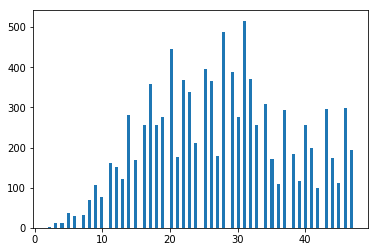

In [7]:
import matplotlib.pyplot as plt
plt.hist(embedding_dimensions, bins=100);

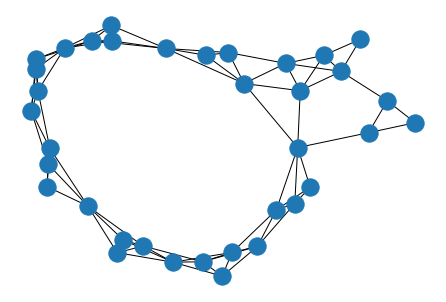

In [19]:
#G = nx.from_numpy_matrix(A)
#pos = nx.layout.fruchterman_reingold_layout(G)
#nx.draw(G, pos=pos)

In [20]:
#cliques = nx.find_cliques(G)
#for i in cliques:
#    print(i)